<a href="https://colab.research.google.com/github/mishra0488/TestAssignment/blob/master/MyFirstGoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This program uses artificial recurrent neural network
# to predict closing stock price of a corporation

In [1]:
# Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get stock code

In [3]:
df = web.DataReader('AAPL', data_source='yahoo', start='01-01-2012', end='20-03-2021')
# Show data
df.shape # get number of row col

(2318, 6)

In [ ]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# create a new dataframe with only the close column
data = df.filter(['Close'])
# convert the dataframe to a numpy error
dataset = data.values
# Get the number of rows to train the LSTM maodel
training_data_len = math.ceil(len(dataset)*.8)  # ceil to round up and .8 for 80% training set
training_data_len

1855

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1)) # Scale the data between 0 and 1
scaled_data = scaler.fit_transform(dataset)
scaled_data

In [ ]:
# Create the training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and Y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

In [8]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data (currently the data is in 2d shape so this is needed to convert the data into 3d(expected for neural network))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

In [10]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
# compile the modedl
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1795/1795 [==============================] - 42s 22ms/step - loss: 4.5606e-04


In [14]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# create the data set x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [15]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
# Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [18]:
# Get the root mean square error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2.4473188412627187

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


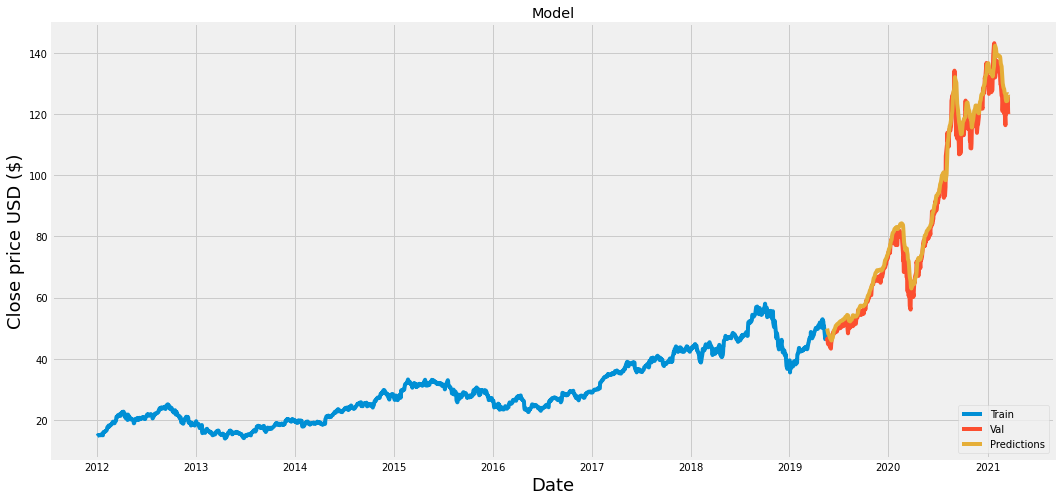

In [20]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
# Show the valid and predicted prices
valid

,Close,predictions
Date,,
2019-05-20,45.772499,49.887344
2019-05-21,46.650002,49.391258
2019-05-22,45.695000,49.033588
2019-05-23,44.915001,48.651367
2019-05-24,44.742500,48.203083
...,...,...
2021-03-15,123.989998,124.315872
2021-03-16,125.570000,124.868782
2021-03-17,124.760002,125.758766
